In [1]:
# Import packages
import torch
import torch.nn as nn

import torchvision.transforms.v2 as transforms
from torch.utils.data import DataLoader
from torchvision import datasets

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress

import torch.fft as fft
import time

import helpers

In [118]:
N=10000
torch.det(torch.eye(N,N)+torch.randn(N,N)/N)

tensor(0.9987)

In [6]:
z = torch.tensor([-1.2 + 1.2j, -2.0 + 2.3j, 3.1 - 3.6j])
print(z)
print(torch.conj(z))
print(z*torch.conj(z))
print(torch.abs(z)**2)

tensor([-1.2000+1.2000j, -2.0000+2.3000j,  3.1000-3.6000j])
tensor([-1.2000-1.2000j, -2.0000-2.3000j,  3.1000+3.6000j])
tensor([ 2.8800+5.7220e-08j,  9.2900+0.0000e+00j, 22.5700+4.6730e-07j])
tensor([ 2.8800,  9.2900, 22.5700])


In [ ]:
# Uncomment and run these when making changes to .py files that require reloading modules
# Can also restart kernel, but this allows for reloading without running everything again
import importlib
importlib.reload(helpers)

In [ ]:
class FFT(nn.Module): 
    """
    fft2 followed by fftshift to move the signal to the middle.
    """
    def __init__(self):
        super().__init__()
        
    def forward(self, z):
        Z = fft.fftshift(fft.fft2(z))
        return Z  

In [ ]:
center = 96//2
halfwidth = 67/2
print((center+halfwidth)//1)
print((center-halfwidth)//1)
print(81-48)

In [ ]:
def OddClip(z):
    N = z.shape[-1]
    z2=z
    if N%2 == 0:
        z2 = z[...,0:(N-1),0:(N-1)]
    return z2

In [ ]:
z = torch.ones(64, 3, 95, 95)
oddclip = OddClip()
print(oddclip(z).shape)

In [30]:
def load_data(batch_size, num_workers):
    
    # convert data to torch.FloatTensor
    transform = transforms.Compose([
        transforms.ToTensor(),
        nn.ConstantPad2d([2,2,2,2], 0.0)
    ])

    # convert data to torch.FloatTensor
    transform_2 = transforms.Compose([
        transforms.RandomRotation((0, 360)),
        transforms.CenterCrop(67),
        transforms.ToTensor(),
        transforms.Grayscale(),
    ])
    
    # convert data to torch.FloatTensor
    transform_3 = transforms.Compose([
        transforms.ToTensor(),
    ])

    # convert data to torch.FloatTensor
    transform_4 = transforms.Compose([
        transforms.ToTensor(),
        transforms.Grayscale()
    ])
    
    # convert data to torch.FloatTensor
    transform_5 = transforms.Compose([
        transforms.RandomRotation((0, 360)),
        transforms.CenterCrop(67),
        transforms.Resize(33),
        transforms.ToTensor(),
        transforms.Grayscale(),
    ])
    
    # convert data to torch.FloatTensor
    transform_6 = transforms.Compose([
        transforms.ToTensor()
    ])

    # get the training datasets
    train_data_1 = datasets.MNIST(root='data', train=True,
                                    download=True, transform=transform)

    # prepare data loader
    train_loader_1 = torch.utils.data.DataLoader(train_data_1, 
                                            batch_size=batch_size,
                                            num_workers=num_workers)

    # get the training datasets
    train_data_2 = datasets.STL10(root='data',
                                    download=True, transform=transform_2)

    # prepare data loader
    train_loader_2 = torch.utils.data.DataLoader(train_data_2, 
                                            batch_size=batch_size,
                                            num_workers=num_workers)

    # get the training datasets
    train_data_3 = datasets.CIFAR10(root='data', train=True,
                                    download=True, transform=transform_3)

    # prepare data loader
    train_loader_3 = torch.utils.data.DataLoader(train_data_3, 
                                            batch_size=batch_size,
                                            num_workers=num_workers)

    # get the training datasets
    train_data_4 = datasets.CIFAR10(root='data', train=True,
                                    download=True, transform=transform_4)

    # prepare data loader
    train_loader_4 = torch.utils.data.DataLoader(train_data_4, 
                                            batch_size=batch_size,
                                            num_workers=num_workers)
    
    # get the training datasets
    train_data_5 = datasets.STL10(root='data',
                                    download=True, transform=transform_5)

    # prepare data loader
    train_loader_5 = torch.utils.data.DataLoader(train_data_5, 
                                            batch_size=batch_size,
                                            num_workers=num_workers)
    
    # get the training datasets
    train_data_6 = datasets.STL10(root='data',
                                    download=True, transform=transform_6)

    # prepare data loader
    train_loader_6 = torch.utils.data.DataLoader(train_data_6, 
                                            batch_size=batch_size,
                                            num_workers=num_workers)

    train_datasets = [train_data_1, train_data_2, train_data_3, train_data_4, train_data_5, train_data_6]
    train_loaders = [train_loader_1, train_loader_2, train_loader_3, train_loader_4, train_loader_5, train_loader_6]

    return train_datasets, train_loaders

In [31]:
train_datasets, train_loaders = load_data(batch_size=64, num_workers=4)

/Users/ac.randono/anaconda3/envs/experiments_env/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [32]:
train_loader = train_loaders[1]
train_dataset = train_datasets[1]

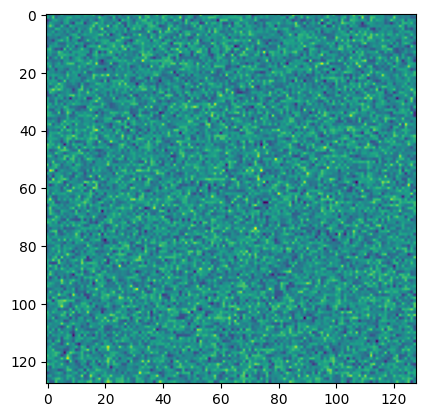

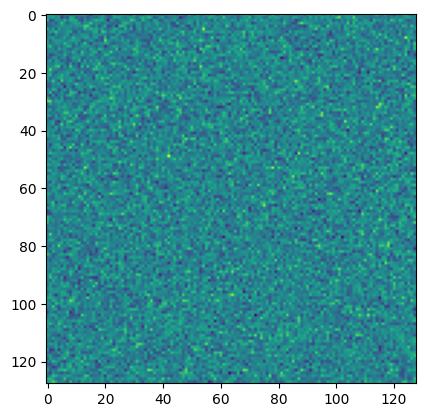

tensor(8.7683) tensor(84.4067)


In [33]:
xr = torch.rand(128,128)
xi = torch.rand(128,128)
xr = 2*(xr-xr.mean())
xi = 2*(xi-xi.mean())
z = torch.complex(xr, xi)
Z = fft.fftshift(fft.fft2(z))

plt.imshow(Z.real)
plt.show()
plt.imshow(Z.imag)
plt.show()

print(Z.imag[0,4], Z.imag[0, 16-4])

In [ ]:
plt.scatter(torch.arange(0,128),Z.real[0,:])

In [ ]:
# obtain one batch of training images
rand_index = np.random.randint(0, len(train_dataset), 1)[0]
image = train_dataset[rand_index][0]

label = train_dataset[rand_index][1]
print(image.shape)

# get one image from the batch
#image = fft.ifft2(fft.ifftshift(image)).real
img = torch.movedim(image, (0,1,2), (2,0,1)).squeeze()

fig = plt.figure(figsize = (3,3)) 
ax = fig.add_subplot(111)
ax.imshow(img, vmin=-30, vmax=30)
plt.title(f'Label: {label}')
plt.show()

In [ ]:
n=0
total_mean = torch.zeros(1)
total_std = torch.ones(1)

for batch_i, images_and_labels in enumerate(train_loader):
    images = images_and_labels[0].squeeze()
    if images.shape[0] != 64:
        break
    
    batch_mean = images.mean(dim=(-1,-2), keepdim=False)
    batch_mean = batch_mean.mean(dim=0, keepdim=False)
    
    batch_std = images.std(dim=(-1,-2), keepdim=False)
    batch_std = batch_std.mean(dim=0, keepdim=False)
    
    total_mean = (total_mean*n + batch_mean)/(n+1)
    total_std = (total_std*n + batch_std)/(n+1)
    
    n+=1
    
print("Total mean of the images:", total_mean[0].item())
print("Total std of the images:", total_std[0].item())

In [ ]:
n=0
image_means = torch.zeros(image.shape[1], image.shape[2])
image_stds = torch.zeros(image.shape[1], image.shape[2])

for batch_i, images_and_labels in enumerate(train_loader):
    images = images_and_labels[0].squeeze()
    #images = (images-images.mean(dim=(2,3), keepdim=True))/images.std(dim=(2,3), keepdim=True)
    images = fft.fftshift(fft.fft2(images))
    batch_mean = images.mean(dim=0)
    batch_std_r = images.real.std(dim=0)
    batch_std_i = images.imag.std(dim=0)
    batch_std = torch.complex(batch_std_r, batch_std_i)
    image_means = (image_means*n + batch_mean)/(n+1)
    image_stds = (image_stds*n + batch_std)/(n+1)
    n+=1
    
print(n)
print(image_means.shape)
print(image_stds.shape)

In [ ]:
N = image_means.shape[0]
S_r = torch.zeros(N,N,N,N)
S_i = torch.zeros(N,N,N,N)
s_r = torch.zeros(64,N,N,N,N)
s_i = torch.zeros(64,N,N,N,N)

Sigma = torch.complex(S_r, S_i)
C = torch.complex(S_r, S_i)
sigma = torch.complex(s_r, s_i)
c = torch.complex(s_r, s_i)

means = image_means.repeat(64, 1, 1)

n=0
t0=time.time()
for batch_i, images_and_labels in enumerate(train_loader):
    images = images_and_labels[0].squeeze()
    
    if n == 100 or images.shape[0] != 64:
        break
    
    images = fft.fftshift(fft.fft2(images)).squeeze()
    
    for i in range(N):
        for j in range(N):
            for I in range(N):
                for J in range(N):
                    sigma[:, I, J, i, j] = (images[:,I,J]-means[:,I,J]) * torch.conj(images[:,i,j]-means[:,i,j])
                    c[:, I, J, i, j] = (images[:,I,J]-means[:,I,J]) * (images[:,i,j]-means[:,i,j])
    
    Sigma = (Sigma*n + sigma.mean(dim=0))/(n+1)
    C = (C*n + c.mean(dim=0))/(n+1)
    
    t1 = time.time()
    print(f"{n}/100 || Time Elapsed = {t1-t0}")
    t0=t1
    
    n+=1

In [ ]:
train_loader_SL10_67 = train_loaders[1]

means_sl10_67 = torch.complex(torch.zeros(67, 67), torch.zeros(67, 67))

n=0
t0 = time.time()

for batch_i, images_and_labels in enumerate(train_loader_SL10_67):
    images = images_and_labels[0].squeeze()
    
    if images.shape[0] != 64:
        break
    
    images = fft.fftshift(fft.fft2(images)).squeeze()
    batch_mean = images.mean(dim=0, keepdim=False)
    
    means_sl10_67 = (means_sl10_67*n + batch_mean)/(n+1)
    
    n+=1

In [ ]:
plt.imshow(means_sl10_67.real, vmin=-10, vmax=10)
plt.show()

In [ ]:
N = 67
S_r = torch.zeros(N,N)
S_i = torch.zeros(N,N)
s_r = torch.zeros(64,N,N)
s_i = torch.zeros(64,N,N)

Sigma_diag = torch.complex(S_r, S_i)
sigma_diag = torch.complex(s_r, s_i)

means =  means_sl10_67.repeat(64, 1, 1)

n=0
t0=time.time()
for batch_i, images_and_labels in enumerate(train_loader_SL10_67):
    images = images_and_labels[0].squeeze()
    
    if images.shape[0] != 64:
        break
    
    images = fft.fftshift(fft.fft2(images)).squeeze()
    
    for i in range(N):
        for j in range(N):
            sigma_diag[:, i, j] = (images[:,i,j]-means[:,i,j]) * torch.conj(images[:,i,j]-means[:,i,j])
    
    Sigma_diag = (Sigma_diag*n + sigma_diag.mean(dim=0))/(n+1)
    
    t1 = time.time()
    print(f"Batch {n} || Time Elapsed = {t1-t0}")
    t0=t1
    
    n+=1

In [ ]:
N = 67
S_r = torch.zeros(N,N)
S_i = torch.zeros(N,N)
s_r = torch.zeros(64,N,N)
s_i = torch.zeros(64,N,N)

Sigma_diag_2 = torch.complex(S_r, S_i)
sigma_diag_2 = torch.complex(s_r, s_i)


n=0
t0=time.time()
for i in range(78):
    images = noiseGenerator67.generate_noise(a=1.72, batch_size=64, color_channels=1, mean=0, std=1)
    images = fft.fftshift(fft.fft2(images)).squeeze()
    
    for i in range(N):
        for j in range(N):
            sigma_diag_2[:, i, j] = (images[:,i,j]) * torch.conj(images[:,i,j])
    
    Sigma_diag_2 = (Sigma_diag_2*n + sigma_diag_2.mean(dim=0))/(n+1)
    
    t1 = time.time()
    print(f"Batch {n} || Time Elapsed = {t1-t0}")
    t0=t1
    
    n+=1

In [ ]:
plt.imshow(torch.log(Sigma_diag_2.real), vmin=0, vmax=10)
plt.show()

plt.imshow(Sigma_diag_2.imag, vmin=-1, vmax=1)
plt.show()

In [ ]:
log_x = []
log_y = []

log_x_2 = []
log_y_2 = []

b = 3
R = .85

for i in range(67):
    for j in range(67):
        r = np.sqrt(((i-33)/33)**2 + ((j-33)/33)**2)
        in_central_cross = ((i<=(33+b) or i<(33+b)) or (j<=(33+b) or j<(33+b)))
        #on_edge = ((i>(66-c) or i<c) or (j>(66-c) or j<c))
        outside_radius = r>R
        if  not (in_central_cross or outside_radius):
            log_x.append(np.log(r))
            log_y.append(np.log(Sigma_diag.real[i,j].item()))
            
        if not (i==33 and j==33):
            log_x_2.append(np.log(r))
            log_y_2.append(np.log(Sigma_diag_2.real[i,j].item()))
        
print(linregress(log_x, log_y))
plt.scatter(log_x, log_y, s=1)
plt.show()

print(linregress(log_x_2, log_y_2))
plt.scatter(log_x_2, log_y_2, s=1)
plt.show()

In [ ]:
mask = torch.zeros(33, 33)
a=3

for i in range(33):
    for j in range(33):
        if (i < (16+a) and i>(16-a)) or (j<(16+a) and j>(16-a)):
            mask[i,j]=-10000

In [ ]:

for q in range(33):
    plt.imshow(Sigma[q, q, :, :].real+mask, vmin=-10, vmax=10)
    plt.show()
    #plt.imshow(Sigma[10, q, :, :].imag+C[32-10, 32-q, :, :].imag, vmin=-10, vmax=10)
    #plt.show()
    #print("====================")

In [ ]:
print(images_mean.abs().max(), images_mean.abs().min(), images_mean.abs().mean(), images_mean.abs().std())
print(images_std.abs().max(), images_std.abs().min(), images_std.abs().mean(), images_std.abs().std())

plt.imshow(images_mean.abs(), vmin=0, vmax=5)
plt.show()

plt.imshow(images_mean.real, vmin=-5, vmax=5)
plt.show()

plt.imshow(images_mean.imag, vmin=-5, vmax=5)
plt.show()

plt.imshow(images_std.abs(), vmin=0, vmax=30)
plt.show()

plt.imshow(images_std.real, vmin=-30, vmax=30)
plt.show()

plt.imshow(images_std.imag, vmin=-30, vmax=30)
plt.show()

a = 3

L = 67
L0 = 33


r = []
y = []
for i in range(L):
    for j in range(L):
        radius = np.sqrt((i-L0)**2 + (j-L0)**2)
        value = images_std.abs()[i,j].item()
        if (i >= L0+a or i <= L0-a) and  (j >= L0+a or j <= L0-a) and radius <= 31:
            y.append(np.log(value))
            r.append(np.log(radius))
plt.scatter(r, y, s=1)
plt.show()
print(linregress(r, y))


r = []
y = []
for i in range(L):
    for j in range(L):
        radius = np.sqrt((i-L0)**2 + (j-L0)**2)
        value = images_std.real[i,j].item()
        if (i >= L0+a or i <= L0-a) and  (j >= L0+a or j <= L0-a) and radius <= 31:
            y.append(np.log(value))
            r.append(np.log(radius))
plt.scatter(r, y, s=1)
plt.show()
print(linregress(r, y))


r = []
y = []
for i in range(L):
    for j in range(L):
        radius = np.sqrt((i-L0)**2 + (j-L0)**2)
        value = images_std.imag[i,j].item()
        if (i >= L0+a or i <= L0-a) and  (j >= L0+a or j <= L0-a) and radius <= 31:
            y.append(np.log(value))
            r.append(np.log(radius))
plt.scatter(r, y, s=1)
plt.show()
print(linregress(r, y))

In [ ]:
def get_norm_and_std(train_loader):
    running_mean = 0
    running_mean_std = 0
    n = 0
    
    for batch_i, images_and_labels in enumerate(train_loader):
        images = images_and_labels[0]
        batch_means = torch.mean(images, dim=(2,3))
        batch_mean = torch.mean(batch_means, dim=0)
        batch_mean_std = torch.std(batch_means, dim=0)
        
        running_mean = (running_mean*n + batch_mean)/(n+1)
        running_mean_std = (running_mean_std*n + batch_mean_std)/(n+1)
        n += 1
    
    return running_mean, running_mean_std

In [ ]:
N = 400
average = 0

X = []
Y = []

for n in range(N):
    x = torch.randn(64, 256, 256)
    y = torch.randn(64, 256, 256)
    d = x-y
    d2 = d*d
    a = torch.sqrt(torch.sum(d2, dim=(1,2), keepdim=False))/256
    a = torch.mean(a).item()
    
    average = (average*n + a)/(n+1)
    X.append(n)
    Y.append(average)

print(average)
plt.plot(X, Y)
plt.show()


In [ ]:
sig = torch.complex(torch.zeros(32,32), torch.zeros(32,32))

for i in range(32):
    for j in range(32):
        sig[i,j] = torch.sqrt(Sigma[i,j,i,j])

In [ ]:
plt.imshow(torch.log(sig.real), vmin=0, vmax=4.5)
plt.show()

In [ ]:
log_r = []
nlog_sigma = []
for i in range(32):
    for j in range(32):
        r = np.sqrt(((i-16)/15)**2+((j-16)/15)**2)
        if (i > 17 or i < 15) and (j > 17 or j < 1) and r < 15:
            log_r.append(np.log(r))
            nlog_sigma.append(np.log(sig[i,j].item()))
            
plt.scatter(log_r, nlog_sigma)
plt.show()

print(linregress(log_r, nlog_sigma))

In [ ]:
A = torch.tensor([-1 + 1j, -2 + 2j, 3 - 3j])
print(A)
print(torch.conj(A))

br = torch.tensor([[1.0, 2.0, 3.0], [0.0,0.0,0.0],[0.0,0.0,0.0]])
bi = torch.tensor([[4.0, 5.0, 6.0], [0.0,0.0,0.0],[0.0,0.0,0.0]])

B = torch.complex(br, bi)
print(B.imag)
print(torch.conj(B).imag)

In [ ]:
class NoiseGenerator:
    def __init__(self, N:int=256): 
        super().__init__()
        self.N = N
        self.dist = self.build_dist()
        
    def build_dist(self):
        """
        Returns the distance tensor for use in the noise generator
        The noise generator must have odd dimensions so adds a row and column if N is even
        """
        M = self.N
    
        if self.N%2 == 0:
            M=self.N+1
            
        dist_squared = torch.zeros(1,1,M,M)

        # Calculate distance tensor
        for i in range(M):
            for j in range(M):
                center = M // 2
                dist_squared[:,:,i,j] = ((i-center)/M)**2 + ((j-center)/M)**2
        dist = torch.sqrt(dist_squared)  
        
        return dist
        
    def generate_noise(self,a=2, batch_size=1, color_channels=3, mean=0.0, std=1.0):
        """
        Generates square tensor of scale invariant noise of size 2^Nx2^N. 
        The scale factor, a, determines the noise character.
        a = 0 : White Noise
        a = 1 : Pink Noise
        a = 2 : Brownian Noise
        """
        M = self.N
        
        if self.N%2 == 0:
            M=self.N+1
            
        # Without a center point the noise tends to be slightly skewed diagonally at large wavelengths
        # So to compensate we add an extra row and column in Fourier space so that the exact center exists
        # We remove a row and column in the final output
        # Note: complex functionality is not fully implements on mps so work on cpu first, then output real tensor to mps
        xr = torch.randn(batch_size, color_channels, M, M)
        xi = torch.randn(batch_size, color_channels, M, M)
        fft = torch.complex(xr, xi)
        
        dist = self.dist.repeat(batch_size, color_channels, 1, 1)
        # 1/dist has a divide by zero error at the center point
        # Save the value of this point and reset it after dividing by distance
        # Note: the value at the center point controls the standard deviation of the mean of the color channels...
        # ...since we don't need much variation in the mean we are safe by resetting it
        fft = fft/(dist**a)
        fft[:,:,M//2, M//2] = 0.0
        fft = torch.fft.ifftshift(fft)
        x = torch.fft.ifft2(fft).real
        if M != self.N:
            x=x[:,:,0:self.N,0:self.N]
        
        x = (std/x.std()) * x + (mean - x.mean())

        # Squeeze the output to be between zero and one
#         maxi = torch.max(torch.abs(x.max()), torch.abs(x.min()))
#         x = x/maxi
#         x = (x+1)/2

#         x = x[:,:,0:2**N,0:2**N]
        
        return x

In [ ]:
noiseGenerator67 = NoiseGenerator(N=67)

In [ ]:
noise67 = noiseGenerator67.generate_noise(a=2.728321536977703/2, batch_size=1, color_channels=1, mean=0.4344141483306885, std=0.19279254972934723)
print(noise67.shape)
plt.imshow(noise67.squeeze(), vmin=0, vmax=1)
plt.show()
print(noise67.max())
print(noise67.min())

In [ ]:
noiseGenerator33 = NoiseGenerator(N=33)

In [ ]:
mu_whites = torch.zeros(33,33)
mu_clouds = torch.zeros(33,33)
mu_images = torch.zeros(33,33)

measured_mean = 0.4341714680194855
measured_std = 0.1924629658460617

n=0

for batch_i, images_and_labels in enumerate(train_loader):  
    images = images_and_labels[0].squeeze()
    if images.shape[0] != 64:
        break
        
    whites = measured_std * torch.randn_like(images) + measured_mean
    clouds = noiseGenerator33.generate_noise(a=2.0, batch_size=64, color_channels=1, mean=measured_mean, std=measured_std).squeeze()
    
    batch_mu_images = images.mean(dim=0)
    batch_mu_whites = whites.mean(dim=0)
    batch_mu_clouds = clouds.mean(dim=0)
    
    mu_images = (mu_images*n + batch_mu_images)/(n+1)
    mu_whites = (mu_whites*n + batch_mu_whites)/(n+1)
    mu_clouds = (mu_clouds*n + batch_mu_clouds)/(n+1)
    
    n+=1
    
plt.imshow(mu_images, vmin=.4, vmax=.45)
plt.show()

plt.imshow(mu_whites, vmin=.4, vmax=.45)
plt.show()

plt.imshow(mu_clouds, vmin=.4, vmax=.45)
plt.show()

In [ ]:
d_image_image = torch.zeros(1)
n=0

for batch_i, images_and_labels in enumerate(train_loader):  
    images = images_and_labels[0].squeeze()
    if images.shape[0] != 64:
        break
        
    p = 0
    dist = torch.zeros(1)
    
    for i in range(64):
        for j in range(64):
            if i != j:
                dist_item = (((images[i]-mu_images)*(images[j]-mu_images))**2).sum(dim=(0,1))
                dist = (dist*p + dist_item)/(p+1)
                p+=1
    
    d_image_image = (d_image_image*n + dist)/(n+1)
    
    print("Image/Image distance:", d_image_image[0].item())
    n+=1
    

# print("Image/Image distance:", d_image_image[0].item())

In [ ]:
d_cloud_image = torch.zeros(1)
d_image_white = torch.zeros(1)
d_cloud_white = torch.zeros(1)
d_cloud_cloud = torch.zeros(1)
d_white_white = torch.zeros(1)

measured_mean = 0.4341714680194855
measured_std = 0.1924629658460617

n=0
a=2.0


for batch_i, images_and_labels in enumerate(train_loader):  
    images = images_and_labels[0].squeeze()

    if images.shape[0] != 64:
        break

    cloud_noise = noiseGenerator33.generate_noise(a=a, batch_size=images.shape[0], color_channels=1, mean=measured_mean, std=measured_std).squeeze()
    white_noise = measured_std * torch.randn_like(images) + measured_mean

    cloud_noise_2 = noiseGenerator33.generate_noise(a=a, batch_size=images.shape[0], color_channels=1, mean=measured_mean, std=measured_std).squeeze()
    white_noise_2 = measured_std * torch.randn_like(images) + measured_mean

    batch_d_cloud_image = (((images-mu_images)*(cloud_noise-mu_clouds))**2).sum(dim=(1,2)).mean(dim=0)
    batch_d_image_white = (((images-mu_images)*(white_noise-mu_whites))**2).sum(dim=(1,2)).mean(dim=0)
    batch_d_cloud_white = (((cloud_noise-mu_clouds)*(white_noise-mu_whites))**2).sum(dim=(1,2)).mean(dim=0)
    batch_d_cloud_cloud = (((cloud_noise-mu_clouds)*(cloud_noise_2-mu_clouds))**2).sum(dim=(1,2)).mean(dim=0)
    batch_d_white_white = (((white_noise-mu_whites)*(white_noise_2-mu_whites))**2).sum(dim=(1,2)).mean(dim=0)


    d_cloud_image = (d_cloud_image*n + batch_d_cloud_image)/(n+1)
    d_image_white = (d_image_white*n + batch_d_image_white)/(n+1)
    d_cloud_white = (d_cloud_white*n + batch_d_cloud_white)/(n+1)
    d_cloud_cloud = (d_cloud_cloud*n + batch_d_cloud_cloud)/(n+1)
    d_white_white = (d_white_white*n + batch_d_white_white)/(n+1)

    print(f"========= n={n} =========")
    print("L2 cloud/image noise distance:", d_cloud_image[0].item())
    print("L2 white/image noise distance:", d_image_white[0].item())
    print("L2 cloud/white noise distance:", d_cloud_white[0].item())
    print("L2 cloud/cloud noise distance:", d_cloud_cloud[0].item())
    print("L2 white/white noise distance:", d_white_white[0].item())
    
    n+=1


In [ ]:
p=5
rand_index = np.random.randint(0, len(train_datasets[p]), 1)[0]
image = train_datasets[p][rand_index][0].squeeze()
print(image.shape)

noiseGenerator96 = NoiseGenerator(N=96)
noise = noiseGenerator96.generate_noise(a=2, batch_size=1, color_channels=3, mean=measured_mean, std=measured_std).squeeze()

plt.imshow(torch.movedim(noise, (0,1,2), (2,0,1)))
plt.show()

In [ ]:
noisy_image = train_datasets[1]

for i in range(100):
    noise_i = noise_0
    for q in range(i):
        noise_i = noise_i + noiseGenerator96.generate_noise(a=2.728321536977703/2, color_channels=1, mean=measured_mean, std=measured_std).squeeze()
    plt.imshow(noise_i/q)
    plt.show()

In [ ]:
rand_index = np.random.randint(0, len(train_datasets[5]), 1)[0]
image = train_datasets[5][rand_index][0].squeeze()
image = transforms.functional.rgb_to_grayscale(image)

mean0 = image.mean(dim=(-2,-1), keepdim=True)
std0 = image.std(dim=(-2,-1), keepdim=True)

for i in range(1000):
    delta_noise = noiseGenerator96.generate_noise(a=2.728321536977703/2, batch_size=1, color_channels=1, mean=measured_mean, std=measured_std).squeeze()
    image = np.cos(np.pi/2 * np.sin(np.pi/2 * (i/999))**2) * image + np.sin(np.pi/2 * np.sin(np.pi/2 * (i/999))**2) * delta_noise
    
    if i%100 == 0:
        mean = image.mean(dim=(-2,-1), keepdim=True)
        std = image.std(dim=(-2,-1), keepdim=True)
        
        display_image = (image-mean+mean0)*std0/std
        
        plt.imshow(torch.movedim(display_image, (0,1,2), (2,0,1)), cmap="gray")
        plt.show()

In [ ]:
x = torch.randn(64, 64)
print(x.dtype)
print(x.type())
z = torch.zeros(64, 64, dtype=torch.cfloat)
print(z.dtype)
print(z.type())

print(z.real.dtype)

In [ ]:
M = torch.randint(0, 64, (1,)).item()
image = train_datasets[2][M][0]
print(image.shape)
image = torch.movedim(image, (0,1,2), (2,0,1))
plt.imshow(image)
plt.show()

In [ ]:
Mu_real = torch.zeros(3,32,32)
Mu = torch.zeros(3,32,32, dtype=torch.cfloat)
m = 0

for batch_i, images_and_labels in enumerate(train_loaders[2]):  
    real_images = images_and_labels[0].squeeze()
    fft_images = torch.fft.fftshift(torch.fft.fft2(real_images))
    
    for b in range(real_images.shape[0]):
        Mu = (Mu*m + fft_images[b])/(m+1)
        Mu_real = (Mu_real*m + real_images[b])/(m+1)
        m+=1

In [ ]:
Sigma_diag_real = torch.zeros(3,32,32)
Sigma_diag_fft = torch.zeros(3,32,32, dtype=torch.cfloat)
m = 0

for batch_i, images_and_labels in enumerate(train_loaders[2]):  
    real_images = images_and_labels[0].squeeze()
    fft_images = torch.fft.fftshift(torch.fft.fft2(real_images))
    
    for b in range(real_images.shape[0]):
        _Sigma_diag_real = (real_images[b] - Mu_real)**2
        _Sigma_diag_fft = (fft_images[b] - Mu).abs().real**2
        
        Sigma_diag_real = (Sigma_diag_real*m + _Sigma_diag_real)/(m+1)
        Sigma_diag_fft = (Sigma_diag_fft*m + _Sigma_diag_fft)/(m+1)
        m+=1

print(m)

In [ ]:
Sigma_real = torch.zeros(3,32,32)
Sigma_fft = torch.zeros(3,32,32, dtype=torch.cfloat)
m = 0

for batch_i, images_and_labels in enumerate(train_loaders[2]):  
    real_images = images_and_labels[0].squeeze()
    fft_images = torch.fft.fftshift(torch.fft.fft2(real_images))
    
    for b in range(real_images.shape[0]):
        _Sigma_diag_real = (real_images[b] - Mu_real)**2
        _Sigma_diag_fft = (fft_images[b] - Mu).abs().real**2
        
        Sigma_diag_real = (Sigma_diag_real*m + _Sigma_diag_real)/(m+1)
        Sigma_diag_fft = (Sigma_diag_fft*m + _Sigma_diag_fft)/(m+1)
        m+=1

print(m)

In [ ]:
Sig = Sigma_diag_fft.real/(Sigma_diag_fft.real.max())

plt.imshow(Sigma_diag_fft.real[0], vmin=0, vmax=20)
plt.show()

In [ ]:
N = 32
T = N*6
E = torch.zeros(N,T)
E_r = torch.zeros(N,T)
E_i = torch.zeros(N,T)
A=50
for n in range(N):
    for t in range(T):
        theta = 2*np.pi*t/T * A*(n/(N-1))**2
        E_r[n,t] = np.sin(theta)
        E_i[n,t] = np.cos(theta)
    
E = torch.complex(E_r, E_i)

plt.imshow(E.real)
plt.show()

plt.imshow(E.imag)
plt.show()

In [ ]:
z_r = torch.tensor([[2.0, 3.0, 4.0, 5.0]])
z_i = torch.tensor([[6.0,7.0,8.0,9.0]])
z = torch.complex(z_r,z_i)
print(z)
maxpool = torch.nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
print(maxpool(z_r))

In [ ]:
x = torch.rand(64,4,4)
y = torch.rand(64,4,4)
conv_real = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, bias=False)
conv_complex = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, dtype=torch.cfloat)
print(conv_real(x))
print(conv_real(y))
print(conv_complex(torch.complex(x,y)))

In [ ]:
N=64
B = 64

A = torch.rand(B,N,N)
B = torch.rand(B,N,N)

t0 =time.time()
AB1 = torch.einsum("bij,bkl->bijkl",A,B)
print(time.time()-t0)
print(AB1.shape)

In [ ]:
N = 128
B = 64
I = torch.arange(0,N,1)
J = torch.arange(0,N,1)
I = I.unsqueeze(0).unsqueeze(-1)
J = J.unsqueeze(0).unsqueeze(0)

print(I.shape)
print(J.shape)

I = I.repeat((B, 1, N))
J = J.repeat((B, N, 1))


print(I.shape)
print(J.shape)

r = torch.sqrt((I/(N//2)-1)**2 + (J/(N//2)-1)**2)

plt.imshow(I[0])

In [ ]:
import unet

In [ ]:
Z = torch.rand([64,64,32,32], dtype=torch.cfloat)
resblock = unet.ResidualBlock(64, 64, dtype=torch.cfloat)
print(Z.shape)
print(resblock(Z).shape)
print(Z.dtype)

In [ ]:
Z = torch.rand([64,64,32,32], dtype=torch.cfloat)
downblock = unet.DownBlock(64, 128, dtype=torch.cfloat)
print(Z.shape)
print(downblock(Z).shape)

In [ ]:
Z = torch.rand([64,64,16,16], dtype=torch.cfloat)
downblock = unet.DownBlock(64, 96, ceil_mode=True)
resblock1 = unet.ResidualBlock(96, 128)
resblock2 = unet.ResidualBlock(128, 128)
upblock = unet.UpBlock(128, 96, downblock_pair=downblock)
print(f"Input: {Z.shape} || dtype = {Z.dtype}")
Z = downblock(Z)
print(f"After downblock: {Z.shape} || dtype = {Z.dtype}")
Z = resblock1(Z)
print(f"After resblock1: {Z.shape} || dtype = {Z.dtype}")
Z = resblock2(Z)
print(f"After resblock2: {Z.shape} || dtype = {Z.dtype}")
Z = upblock(Z)
print(f"After upblock: {Z.shape} || dtype = {Z.dtype}")

In [ ]:
z = torch.rand(64, 67, 67, dtype=torch.cfloat)

t0 = time.time()
Z = fft.fftshift(fft.fft2(z))
Sigma = torch.einsum("bij,bkl->bijkl", Z, torch.conj(Z))
C = torch.einsum("bij,bkl->bijkl", Z, Z)
print(time.time()-t0)

In [ ]:
print(len(train_loaders[1]))

In [ ]:
mu = torch.zeros(67,67, dtype = torch.float)
Mu = torch.zeros(67,67, dtype=torch.cfloat)
n = 0

for batch_i, images_and_labels in enumerate(train_loaders[1]):  
    
    real_images = images_and_labels[0].squeeze()
    
    if real_images.shape[0] != 64:
        break
    
    split_images_r, split_images_i = torch.split(real_images, (32,32), dim=0)
    split_images = torch.complex(split_images_r, split_images_i)
    fft_images = torch.fft.fftshift(torch.fft.fft2(split_images))
    
    _mu = torch.mean(real_images, dim=0)
    _Mu = torch.mean(fft_images, dim=0)
    
    mu = (mu*n + _mu)/(n+1)
    Mu = (Mu*n + _Mu)/(n+1)
    
    n+=1

In [ ]:
plt.imshow(mu, vmin=.4,vmax=.6)
plt.show()

plt.imshow(Mu.real, vmin=-10, vmax=10)
plt.show()

plt.imshow(Mu.imag, vmin=-10, vmax=10)
plt.show()

plt.imshow((Mu.real-Mu.imag).abs(), vmin=0, vmax=10)
plt.show()

In [ ]:
Sigma_real = torch.zeros(67,67,67,67, dtype = torch.float)
# Sigma_fft = torch.zeros(67,67,67,67, dtype=torch.cfloat)
# C_fft = torch.zeros(67,67,67,67, dtype=torch.cfloat)
n = 0

for batch_i, images_and_labels in enumerate(train_loaders[1]):  
    t0 = time.time()
    real_images = images_and_labels[0].squeeze()
    
    if real_images.shape[0] != 64:
        break
    
    # split_images_r, split_images_i = torch.split(real_images, (32,32), dim=0)
    # split_images = torch.complex(split_images_r, split_images_i)
    # fft_images = torch.fft.fftshift(torch.fft.fft2(split_images))
    
    _Sigma_real = torch.einsum("bij,bkl->ijkl", real_images-mu, real_images-mu)/64
    # _Sigma_fft = torch.einsum("bij,bkl->ijkl", fft_images-Mu, torch.conj(fft_images-Mu))/64
    # _C_fft = torch.einsum("bij,bkl->bijkl", fft_images-Mu, fft_images-Mu)/64
    
    Sigma_real = (Sigma_real*n + _Sigma_real)/(n+1)
    # Sigma_fft = (Sigma_fft*n + _Sigma_fft)/(n+1)
    # C_fft = (C_fft*n + _C_fft)/(n+1)
    
    print(f"batch {n} computed in {time.time()-t0} seconds")
    
    n+=1

In [ ]:
N=10
fig, axs = plt.subplots(N,3, figsize=(12, 20))
for i in range(N):
    x0 = np.random.randint(67)
    y0 = np.random.randint(67)
    
    axs[i][0].imshow(Sigma_real[:,:,x0,y0])
    axs[i][1].imshow(Sigma_fft[:,:,x0,y0].abs(), vmin=0, vmax=30)
    axs[i][2].imshow(Sigma_fft[:,:,x0,y0].abs(), vmin=0, vmax=30)
plt.show()

In [ ]:
Sigma_fft_diag=torch.zeros(67,67, dtype=torch.cfloat)
for i in range(67):
    for j in range(67):
        Sigma_fft_diag[i,j] = Sigma_fft[i,j,i,j]

In [ ]:
plt.imshow(Sigma_fft_diag.real, vmin=0, vmax=100)

In [ ]:
S_diag = Sigma_fft_diag.real
S_diag[33, 33]=0.0
S_diag.real.max()

In [ ]:
Sigma_real = torch.zeros(67,67,67,67, dtype = torch.float)
Sigma_fft = torch.zeros(67,67,67,67, dtype=torch.cfloat)
C_fft = torch.zeros(67,67,67,67, dtype=torch.cfloat)
n = 0

for batch_i, images_and_labels in enumerate(train_loaders[1]):  
    t0 = time.time()
    real_images = images_and_labels[0].squeeze()
    
    if real_images.shape[0] != 64:
        break
    
    split_images_r, split_images_i = torch.split(real_images, (32,32), dim=0)
    split_images = torch.complex(split_images_r, split_images_i)
    fft_images = torch.fft.fftshift(torch.fft.fft2(split_images))
    
    _Sigma_real = torch.einsum("bij,bkl->ijkl", real_images-mu, real_images-mu)/64
    _Sigma_fft = torch.einsum("bij,bkl->ijkl", fft_images-Mu, torch.conj(fft_images-Mu))/64
    _C_fft = torch.einsum("bij,bkl->ijkl", fft_images-Mu, fft_images-Mu)/64
    
    Sigma_real = (Sigma_real*n + _Sigma_real)/(n+1)
    Sigma_fft = (Sigma_fft*n + _Sigma_fft)/(n+1)
    C_fft = (C_fft*n + _C_fft)/(n+1)
    
    print(f"batch {n} computed in {time.time()-t0} seconds")
    
    n+=1

In [ ]:
plt.imshow(Sigma_fft[:,:, 15, 20].real, vmin=0, vmax=100)
plt.show()

In [ ]:
#Sigma_real = torch.zeros(67,67,67,67, dtype = torch.float)
# Sigma_fft = torch.zeros(67,67,67,67, dtype=torch.cfloat)
C_fft = torch.zeros(67,67,67,67, dtype=torch.cfloat)
n = 0

for batch_i, images_and_labels in enumerate(train_loaders[1]):  
    t0 = time.time()
    real_images = images_and_labels[0].squeeze()
    
    if real_images.shape[0] != 64:
        break
    
    split_images_r, split_images_i = torch.split(real_images, (32,32), dim=0)
    split_images = torch.complex(split_images_r, split_images_i)
    fft_images = torch.fft.fftshift(torch.fft.fft2(split_images))
    
    #_Sigma_real = torch.einsum("bij,bkl->ijkl", real_images-mu, real_images-mu)/64
    # _Sigma_fft = torch.einsum("bij,bkl->ijkl", fft_images-Mu, torch.conj(fft_images-Mu))/64
    _C_fft = torch.einsum("bij,bkl->ijkl", fft_images-Mu, fft_images-Mu)/64
    
    # Sigma_real = (Sigma_real*n + _Sigma_real)/(n+1)
    #Sigma_fft = (Sigma_fft*n + _Sigma_fft)/(n+1)
    C_fft = (C_fft*n + _C_fft)/(n+1)
    
    print(f"batch {n} computed in {time.time()-t0} seconds")
    
    n+=1

In [ ]:
x0 = [5, 4]
plt.imshow(C_fft.abs()[:,:,x0[0],x0[1]], vmin=0, vmax=100)
plt.show()

In [ ]:
print(torch.__version__)

In [ ]:
! python --version

In [ ]:
class ComplexNoise():
    def __init__(self,N):
        self.N = N
        # self.Delta = Delta
        # self.A = A
        self.dist = self.get_dist()
    
    def get_dist(self):
        index_list = torch.arange(0, self.N)
        N = self.N
        I = index_list.unsqueeze(-1).repeat(1,N)
        J = index_list.unsqueeze(0).repeat(N,1)
        x0 = N//2
        dist = torch.sqrt(((I-x0)/(N-1))**2+((J-x0)/(N-1))**2)
        return dist
    
    
    def generate_noise(self,Delta, A):
        Z = A/self.dist**Delta * torch.randn(self.N,self.N,dtype=torch.cfloat)
        Z[self.N//2,self.N//2]=0.+0.j
        z = fft.ifft2(fft.ifftshift(Z))
    
        return z, Z

In [ ]:
N=96
Delta=1.3
A=1
complex_noise = ComplexNoise(N)

z_mean = 0
z_std = 0
Z_mean = 0
Z_std = 0

for n in range(10000):
    z, Z = complex_noise.generate_noise(Delta, A)
    
    z_mean = (z_mean*n + z.mean())/(n+1)
    z_std = (z_std*n+ complex(z.real.std(), z.imag.std()))/(n+1)
    
    Z_mean = (Z_mean*n + Z.mean())/(n+1)
    Z_std = (Z_std*n+ complex(Z.real.std(), Z.imag.std()))/(n+1)
    
print(f"z_mean = ({z_mean.real} || {z_mean.imag})")
print(f"z_std = ({z_std.real} || {z_std.imag})")
print(f"Z_mean = ({Z_mean.real} || {Z_mean.imag})")
print(f"Z_std = ({Z_std.real} || {Z_std.imag})")

In [ ]:
N=96
Delta=1.3
A=1
complex_noise = ComplexNoise(N)

z_mean = 0
z_std = 0
Z_mean = 0
Z_std = 0

for n in range(10000):
    z, Z = complex_noise.generate_noise(Delta, 1/.099)
    
    z_mean = (z_mean*n + z.mean())/(n+1)
    z_std = (z_std*n+ complex(z.real.std(), z.imag.std()))/(n+1)
    
    Z_mean = (Z_mean*n + Z.mean())/(n+1)
    Z_std = (Z_std*n+ complex(Z.real.std(), Z.imag.std()))/(n+1)
    
print(f"z_mean = ({z_mean.real} || {z_mean.imag})")
print(f"z_std = ({z_std.real} || {z_std.imag})")
print(f"Z_mean = ({Z_mean.real} || {Z_mean.imag})")
print(f"Z_std = ({Z_std.real} || {Z_std.imag})")

In [ ]:
import importlib
import unet

In [ ]:
importlib.reload(unet)
unet_test = unet.Fourier_UNet()

In [ ]:
Z = torch.rand((64, 1, 96, 96), dtype=torch.cfloat)
variances = torch.rand(64,1,1,1)
t0 = time.time()
predicted_noise = unet_test(Z, variances)
print(time.time()-t0)

In [ ]:
total_params = sum(p.numel() for p in unet_test.parameters())
print(predicted_noise.shape)
print(total_params)

In [ ]:
batch_size = 64

# convert data to torch.FloatTensor
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),
    FFT()
])

# get the training datasets
test_data = datasets.STL10(root='data', download=True, transform=test_transform, split="unlabeled")

# prepare data loader
test_loader_1 = torch.utils.data.DataLoader(test_data, 
                                            batch_size=batch_size,
                                            shuffle=True,
                                            drop_last=True
                                           )


# prepare data loader
test_loader_2 = torch.utils.data.DataLoader(test_data, 
                                            batch_size=batch_size,
                                            shuffle=True,
                                            drop_last=True
                                           )

In [ ]:
data_iter_1 = iter(test_loader_1)
data_iter_2 = iter(test_loader_2)



def reshuffle_duplicates(batch1, batch2):
    """
    Checks for duplicates in the batch items of the two tensor batches.
    If duplicates are found, reshuffles. Repeats until no duplicates are found.
    Terminates if can't eliminate duplicates in 10 iterations.
    """
    def has_duplicates(batch1, batch2):
        has_duplicates = False

        for i in range(batch1.shape[0]):
            if torch.equal(batch1[i], batch2[i]):
                has_duplicates = True
                break
        return has_duplicates
    
    B = batch1.shape[0]
    duplicates_found = has_duplicates(batch1, batch2)
    n=0
    
    while duplicates_found and n<10:
        new_indices = np.random.permutation(B)
        new_batch = torch.zeros_like(batch2)
        for i in range(B):
            new_batch[i] = batch2[new_indices[i]]
        batch2 = new_batch
        n+=1
        duplicates_found = has_duplicates(batch1, batch2)
        
    if n>=10:
        print("Couldn't reshuffle without duplicates after 10 iterations. Terminating with duplicates.")
        
    return batch1, batch2
        
for n in range(len(data_iter_1)):
    fft_images_1, labels_1 = next(iter(data_iter_1))
    fft_images_2, labels_2 = next(iter(data_iter_2))
    
    fft_images_1, fft_images_2 = reshuffle_duplicates(fft_images_1, fft_images_2)
    
for i in range(fft_images_1.shape[0]):
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0].imshow(fft.ifft2(fft.ifftshift(fft_images_1[i].squeeze())).real, cmap="gray")
    axs[1].imshow(fft.ifft2(fft.ifftshift(fft_images_2[i].squeeze())).real, cmap="gray")
    plt.show()

In [ ]:
avgpool = torch.nn.AvgPool2d(kernel_size=4, stride=4)

def has_bars(x):
    y = avgpool(x)
    minvalue = y.min()
    if minvalue == 0.0:
        return True
    else:
        return False

In [ ]:
def clean_dirty_lists(dataset):
    clean_list = []
    dirty_list = []
    n=0
    for i in range(len(dataset)):
        image, _ = dataset[i]
        
        if has_bars(image):
            dirty_list.append(i)
        else:
            clean_list.append(i)
    return clean_list, dirty_list

In [ ]:
clean_list, dirty_list = clean_dirty_lists(train_datasets[5])

In [ ]:
print(len(clean_list))
print(f"{len(dirty_list)/5000*100}%")

In [ ]:
cleanset = torch.utils.data.Subset(train_datasets[5], clean_list)
dirtyset = torch.utils.data.Subset(train_datasets[5], dirty_list)

In [ ]:

for i in range(64):
    image, _ = dirtyset[i]
    plt.imshow(torch.movedim(image, (0,1,2), (2, 0, 1)))
    plt.show()

In [ ]:
loader = DataLoader(cleanset, batch_size=64, shuffle=True)
cleanloader1 = iter(loader)
cleanloader2 = iter(loader)

images1, _ = next(cleanloader1)
images2, _ = next(cleanloader2)

print(image1.shape)

plt.imshow(torch.movedim(images1[0], (0,1,2), (2,0,1)))
plt.show()

plt.imshow(torch.movedim(images2[0], (0,1,2), (2,0,1)))
plt.show()

In [ ]:
def visualize_batch(z, 
                    noise, 
                    predicted_noise, 
                    input_images_1, 
                    input_images_2, 
                    predicted_images_1, 
                    predicted_images_2):
    
    fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(10,12))
    for i in range(3):
        axs[i][0].imshow(z.detach().real.squeeze()[i])
        axs[i][1].imshow(noise.detach().real.squeeze()[i])
        axs[i][2].imshow(predicted_noise.detach().real.squeeze()[i])
        axs[i][3].imshow(input_images_1.detach().squeeze()[i], vmin=0, vmax=1)
        axs[i][4].imshow(predicted_images_1.detach().squeeze()[i], vmin=0, vmax=1)

        axs[i+3][0].imshow(z.detach().imag.squeeze()[i])
        axs[i+3][1].imshow(noise.detach().imag.squeeze()[i])
        axs[i+3][2].imshow(predicted_noise.detach().imag.squeeze()[i])
        axs[i+3][3].imshow(input_images_2.detach().squeeze()[i], vmin=0, vmax=1)
        axs[i+3][4].imshow(predicted_images_2.detach().squeeze()[i], vmin=0, vmax=1)
        
        axs[i][0].imshow(z.detach().real.squeeze()[i])
        axs[i][1].imshow(noise.detach().real.squeeze()[i])
        axs[i][2].imshow(predicted_noise.detach().real.squeeze()[i])
        axs[i][3].imshow(input_images_1.detach().squeeze()[i], vmin=0, vmax=1)
        axs[i][4].imshow(predicted_images_1.detach().squeeze()[i], vmin=0, vmax=1)

        axs[i+3][0].imshow(z.detach().imag.squeeze()[i])
        axs[i+3][1].imshow(noise.detach().imag.squeeze()[i])
        axs[i+3][2].imshow(predicted_noise.detach().imag.squeeze()[i])
        axs[i+3][3].imshow(input_images_2.detach().squeeze()[i], vmin=0, vmax=1)
        axs[i+3][4].imshow(predicted_images_2.detach().squeeze()[i], vmin=0, vmax=1)

    axs[0][0].set_title("Noisy Input")
    axs[0][1].set_title("Noise")
    axs[0][2].set_title("Pred Noise")
    axs[0][3].set_title("Input Image")
    axs[0][4].set_title("Pred Image")
    
    for row in range(6):
        for col in range(5):
            axs[row][col].set_xticks([])
            axs[row][col].set_yticks([])
    
    plt.show()

In [ ]:
z = torch.randn(64, 1, 96, 96, dtype=torch.cfloat)
noise = torch.randn(64, 1, 96, 96, dtype=torch.cfloat)
predicted_noise = torch.randn(64, 1, 96, 96, dtype=torch.cfloat)
input_images_1 = torch.randn(64, 1, 96, 96, dtype=torch.float)
input_images_2 = torch.randn(64, 1, 96, 96, dtype=torch.float)
predicted_images_1 = torch.randn(64, 1, 96, 96, dtype=torch.float)
predicted_images_2 = torch.randn(64, 1, 96, 96, dtype=torch.float)

visualize_batch(z, 
                noise, 
                predicted_noise, 
                input_images_1, 
                input_images_2, 
                predicted_images_1, 
                predicted_images_2)

In [ ]:
noise_generator_96 = helpers.NoiseGenerator(N=96)
sigma_diag_1, sigma_diag_1 = noise_generator_96.get_sigma_diags(Delta=1.4999373536194076, A=1, batch_size=128)

In [ ]:
print(sigma_diag_1.max())
print(sigma_diag_1.min())
print(sigma_diag_1.mean())
print(sigma_diag_1.std())

print("=========")

print(sigma_diag_2.max())
print(sigma_diag_2.min())
print(sigma_diag_2.mean())
print(sigma_diag_2.std())

In [ ]:
A = 1/torch.sqrt((sigma_diag_1.mean()+sigma_diag_2.mean())/2).item()
print(A)

In [ ]:
normalized_sigma_diag_1, normalized_sigma_diag_2 = noise_generator_96.get_sigma_diags(Delta=1.4999373536194076, A=A, batch_size=128)

In [ ]:
print(normalized_sigma_diag_1.max())
print(normalized_sigma_diag_1.min())
print(normalized_sigma_diag_1.mean())
print(normalized_sigma_diag_1.std())

print("=========")

print(normalized_sigma_diag_2.max())
print(normalized_sigma_diag_2.min())
print(normalized_sigma_diag_2.mean())
print(normalized_sigma_diag_2.std())

In [ ]:
normalized_sigma_diag_1 = torch.einsum("ijij->ij", normalized_sigma1)
normalized_sigma_diag_2 = torch.einsum("ijij->ij", normalized_sigma2)

In [ ]:
print(normalized_sigma_diag_1.max())
print(normalized_sigma_diag_1.min())
print(normalized_sigma_diag_1.mean())
print(normalized_sigma_diag_1.std())

print("=========")

print(normalized_sigma_diag_2.max())
print(normalized_sigma_diag_2.min())
print(normalized_sigma_diag_2.mean())
print(normalized_sigma_diag_2.std())

In [ ]:
print(x1.std())
print(x2.std())

In [ ]:
plt.imshow(sigma_diag_1, vmin=800, vmax=900)
plt.show()

plt.imshow(sigma_diag_2)
plt.show()

In [ ]:
z, Z = noise_generator_96.generate_noise(Delta=1.4999373536194076, A=1)
print(z.real.min())

In [ ]:
noise_generator_96 = helpers.NoiseGenerator(N=96)
A = noise_generator_96.get_normalizing_A(Delta=1.4999373536194076)

In [ ]:
A = noise_generator_96.get_normalizing_A(Delta=1.4999373536194076, batch_size=128, n_batches=10000)

In [ ]:
noise_generator_64 = helpers.NoiseGenerator(64)
A64 = noise_generator_64.get_normalizing_A(Delta=1.4999373536194076)

In [ ]:
A2 = noise_generator_64.get_normalizing_A(Delta=1)

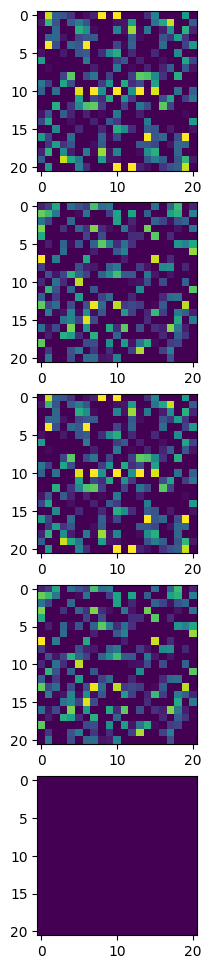

In [103]:
X = torch.rand([21,21])
F = fft.fftshift(fft.fft2(X))
flip_F = torch.flip(F, [0,1])

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 12))
axs[0].imshow(F.real, vmin=0, vmax=10)
axs[1].imshow(F.imag, vmin=0, vmax=10)
axs[2].imshow(flip_F.real, vmin=0, vmax=10)
axs[3].imshow(-flip_F.imag, vmin=0, vmax=10)
axs[4].imshow((F-flip_F).real, vmin=0, vmax=10)

plt.show()

In [33]:
X = torch.rand([6,6])
F = fft.fftshift(fft.rfft2(X))
print(F)
print(torch.real(F))
print(torch.imag(F))

tensor([[ 1.0994+0.3137j,  1.6010+0.0000j,  1.0813+0.0000j, -1.9835+0.3371j],
        [ 0.2736+0.4528j, -0.4544-0.1151j, -1.7091+1.2953j,  1.3733-0.2035j],
        [ 0.3657+2.0307j,  0.2475-1.9379j,  0.7646+0.1897j,  1.0213-0.6532j],
        [ 0.9723+1.1824j,  1.9245+0.0000j, 19.5094+0.0000j, -3.1792-0.3050j],
        [-0.2737+1.9116j,  0.2475+1.9379j,  0.7646-0.1897j, -0.6509-0.3081j],
        [ 1.7545-1.2519j, -0.4544+0.1151j, -1.7091-1.2953j,  0.0833-2.5559j]])
tensor([[ 1.0994,  1.6010,  1.0813, -1.9835],
        [ 0.2736, -0.4544, -1.7091,  1.3733],
        [ 0.3657,  0.2475,  0.7646,  1.0213],
        [ 0.9723,  1.9245, 19.5094, -3.1792],
        [-0.2737,  0.2475,  0.7646, -0.6509],
        [ 1.7545, -0.4544, -1.7091,  0.0833]])
tensor([[ 0.3137,  0.0000,  0.0000,  0.3371],
        [ 0.4528, -0.1151,  1.2953, -0.2035],
        [ 2.0307, -1.9379,  0.1897, -0.6532],
        [ 1.1824,  0.0000,  0.0000, -0.3050],
        [ 1.9116,  1.9379, -0.1897, -0.3081],
        [-1.2519,  0.115

tensor([131.2005+0.0000j,   2.2076+1.5808j,   1.8105-4.3572j,  -5.3295+3.0508j,
          5.7219-1.9727j,   1.8882-3.8720j,  -1.1951+4.7988j,   6.9853-2.1705j,
          8.8152+0.0000j,   6.9853+2.1705j,  -1.1951-4.7988j,   1.8882+3.8720j,
          5.7219+1.9727j,  -5.3295-3.0508j,   1.8105+4.3572j,   2.2076-1.5808j])


In [115]:
X=torch.tensor(([0,1,2,3], [4,5,6,7],[8,9,10,11], [12,13,14,15]))

In [123]:
print(X)
print(torch.flip(X, (0,1)))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])
tensor([[15, 14, 13, 12],
        [11, 10,  9,  8],
        [ 7,  6,  5,  4],
        [ 3,  2,  1,  0]])


In [127]:
A=X[0,1:]
B=X[1:,0]
C=X[1:,1:]
Z=torch.zeros_like(X)
Z[0,1:]=torch.flip(A,(0,))
Z[1:,0]=torch.flip(B,(0,))
Z[1:,1:]= torch.flip(C, (0,1))
print(Z)

tensor([[ 0,  3,  2,  1],
        [12, 15, 14, 13],
        [ 8, 11, 10,  9],
        [ 4,  7,  6,  5]])


In [2]:
def flipit(x):
    N = x.shape[-1]
    if N%2 == 0:
        A=x[0,1:]
        B=x[1:,0]
        C=x[1:,1:]
        
        X=torch.zeros_like(x)
        X[0,0]=x[0,0]
        X[0,1:]=torch.flip(A,(0,))
        X[1:,0]=torch.flip(B,(0,))
        X[1:,1:]= torch.flip(C, (0,1))
    else:
        X = torch.flip(x, (0,1))
        
    return X

In [3]:
def topMask(x):
    N = x.shape[-1]
    mask = torch.ones_like(x)
    
    if N%2 == 0:
        mask[0,(N//2+1):] = 0
        mask[N//2, (N//2+1):] = 0
        mask[(N//2+1):,:] = 0
    else:
        mask[N//2, (N//2+1):]=0
        mask[(N//2+1):,:] = 0
        
    return mask*x

def botMask(x):
    N = x.shape[-1]
    mask = torch.zeros_like(x)
    
    if N%2 == 0:
        mask[0,(N//2+1):] = 1
        mask[N//2, (N//2+1):] = 1
        mask[(N//2+1):,:] = 1
    else:
        mask[N//2, (N//2+1):]=1
        mask[(N//2+1):,:] = 1
        
    return mask*x

In [4]:
def realForm(Z):
    A = topMask(Z.real)
    B = botMask(Z.imag)
    return A+B 

In [26]:
def complexForm(z):
    rA = topMask(z)
    iB = botMask(z)
    iA = topMask(flipit(iB))
    rB = botMask(flipit(rA))

    return rA+rB+1.j*(iB-iA)

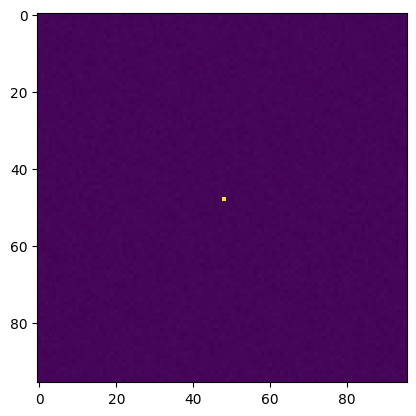

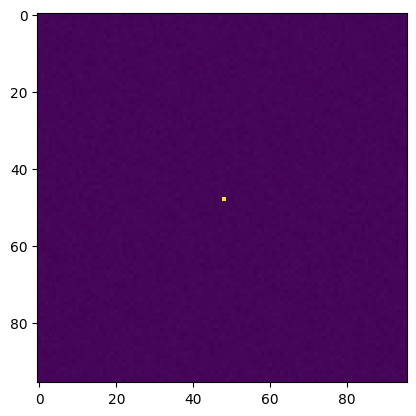

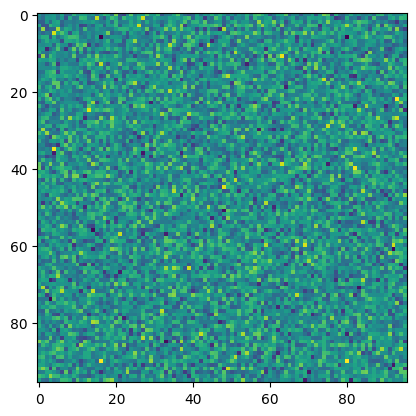

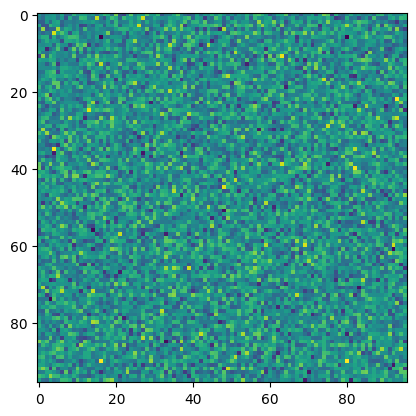

tensor(1.1444e-05)
tensor(1.0490e-05)


In [29]:
N = 96
z = torch.rand((N,N))
Z = fft.fftshift(fft.fft2(z))

rform_Z = realForm(Z)
cform_Z = complexForm(rform_Z)

plt.imshow(Z.real)
plt.show()
plt.imshow(cform_Z.real)
plt.show()
plt.imshow(Z.imag)
plt.show()
plt.imshow(cform_Z.imag)
plt.show()
print(torch.max((Z-cform_Z).real))
print(torch.max((Z-cform_Z).imag))

In [4]:
q = torch.arange(8).view(2, 2, 2)
print(q)

tensor([[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]])


In [8]:
print(torch.flip(q, [q.dim()-2, q.dim()-1]))

tensor([[[3, 2],
         [1, 0]],

        [[7, 6],
         [5, 4]]])


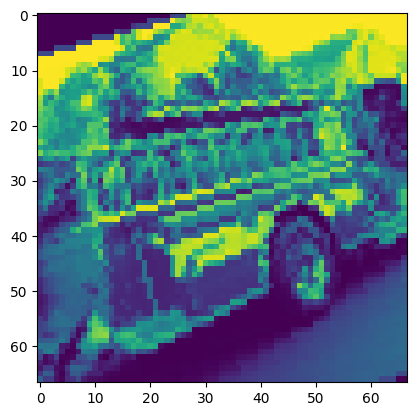

In [62]:
image0 = train_dataset[5][0].squeeze()
plt.imshow(image0)

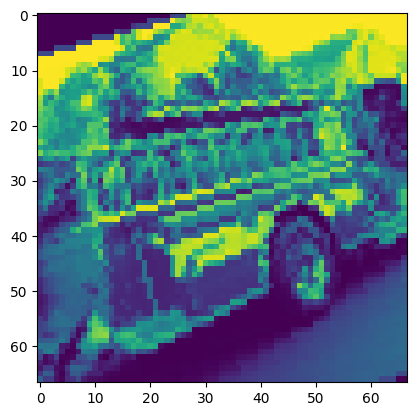

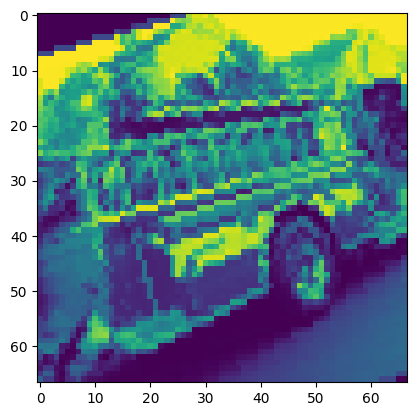

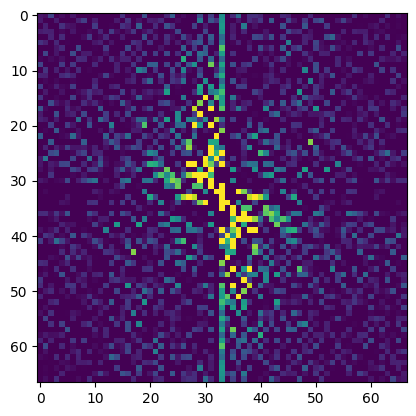

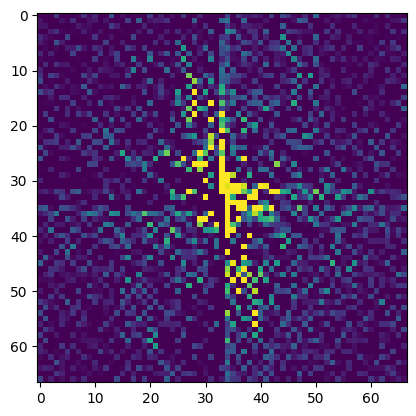

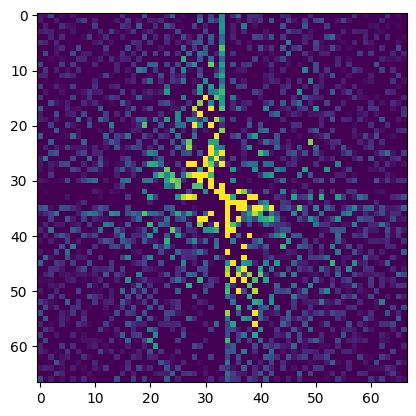

tensor(3.8743e-07)


In [71]:
Z = fft.fftshift(fft.fft2(image0))
z = realForm(Z)
Z2 = complexForm(z)
image0_2 = fft.ifft2(fft.ifftshift(Z2)).real
plt.imshow(image0)
plt.show()
plt.imshow(image0_2)
plt.show()
plt.imshow(Z.real, vmin=0, vmax=30)
plt.show()
plt.imshow(Z.imag, vmin=0, vmax=30)
plt.show()
plt.imshow(z, vmin=0, vmax=30)
plt.show()
print(torch.max(image0-image0_2))